# Codificação de Variáveis Categóricas - One Hot e Dummys


Este notebook demonstra várias formas de codificação de variáveis categóricas utilizando o dataset `dados.xlsx`.
Inclui exemplos com `pandas.get_dummies`, `OneHotEncoder` do `sklearn`, mapeamento manual, e uso com `ColumnTransformer`.

### Colunas categóricas identificadas:
- `MODELO`
- `TRANSMISSAO`
- `PAIS`


In [15]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Carregar o Excel
df = pd.read_excel("dados.xlsx")
df.head()


,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


## Usando `pd.get_dummies()` (one-hot encoding básico)

In [16]:

df_dummies = pd.get_dummies(df, columns=['MODELO', 'TRANSMISSAO', 'PAIS'])
df_dummies.head()


,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,MODELO_ASTON MARTIN,MODELO_BMW X1,MODELO_BMW X5,MODELO_COROLLA,MODELO_CORSA,MODELO_CRETA,...,PAIS_ALEMANHA,PAIS_AUSTRALIA,PAIS_BELGICA,PAIS_BRASIL,PAIS_CANADA,PAIS_ESPANHA,PAIS_EUA,PAIS_HOLANDA,PAIS_INGLATERRA,PAIS_NORUEGA
0,3.0,12,1200,700,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3.0,12,1200,700,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3.0,12,1200,700,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3.0,12,1400,640,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,3.5,10,1600,620,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Usando `pd.get_dummies()` com `drop_first=True`

In [17]:

df_dummies_drop = pd.get_dummies(df, columns=['MODELO', 'TRANSMISSAO', 'PAIS'], drop_first=True)
df_dummies_drop.head()


,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,MODELO_BMW X1,MODELO_BMW X5,MODELO_COROLLA,MODELO_CORSA,MODELO_CRETA,MODELO_FERRARI,...,TRANSMISSAO_MANUAL,PAIS_AUSTRALIA,PAIS_BELGICA,PAIS_BRASIL,PAIS_CANADA,PAIS_ESPANHA,PAIS_EUA,PAIS_HOLANDA,PAIS_INGLATERRA,PAIS_NORUEGA
0,3.0,12,1200,700,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3.0,12,1200,700,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3.0,12,1200,700,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3.0,12,1400,640,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,3.5,10,1600,620,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Usando `OneHotEncoder` do `sklearn`

In [18]:

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df[['PAIS']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['PAIS']))
df_encoded = pd.concat([df.drop(columns=['PAIS']), encoded_df], axis=1)
df_encoded.head()


,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS_AUSTRALIA,PAIS_BELGICA,PAIS_BRASIL,PAIS_CANADA,PAIS_ESPANHA,PAIS_EUA,PAIS_HOLANDA,PAIS_INGLATERRA,PAIS_NORUEGA
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,FERRARI,3.0,12,1400,640,AUTOMATICO,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Usando `ColumnTransformer` e `Pipeline` para múltiplas colunas

In [19]:

categorical = ['MODELO', 'PAIS']
numeric = ['KM-LITRO', 'CILINDROS', 'PESO(KG)', 'CAVALOS']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

pipeline = Pipeline([
    ('preprocess', preprocessor)
])

# Transformar os dados
processed_data = pipeline.fit_transform(df)
processed_data[:5]


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29 stored elements and shape (5, 34)>

##  Codificação manual por mapeamento

In [20]:

modelo_map = {'LABORGUINI': 0, 'FERRARI': 1, 'ASTON MARTIN': 2}
df['MODELO_CODED'] = df['MODELO'].map(modelo_map)
df[['MODELO', 'MODELO_CODED']].drop_duplicates()


,MODELO,MODELO_CODED
0,LABORGUINI,0.0
3,FERRARI,1.0
4,ASTON MARTIN,2.0
5,MERCEDES SL80,NaN
6,HONDA FIT,NaN
7,PALIO,NaN
8,UNO,NaN
9,MOBI,NaN
10,PASSAT,NaN
11,CORSA,NaN


## Aplicando modelo de Árvore de Decisão para prever `KM-LITRO`

In [22]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparar os dados
df_model = df.drop(columns=['KM-LITRO'])
X = pd.get_dummies(df_model, columns=['MODELO', 'TRANSMISSAO', 'PAIS'], drop_first=True)
y = df['KM-LITRO']

# Remover valores nulos
X = X[~y.isnull()]
y = y.dropna()

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
print(f"Erro quadrático médio (MSE): {mse:.4f}")


Erro quadrático médio (MSE): 0.4791


## Frequência de Modelos

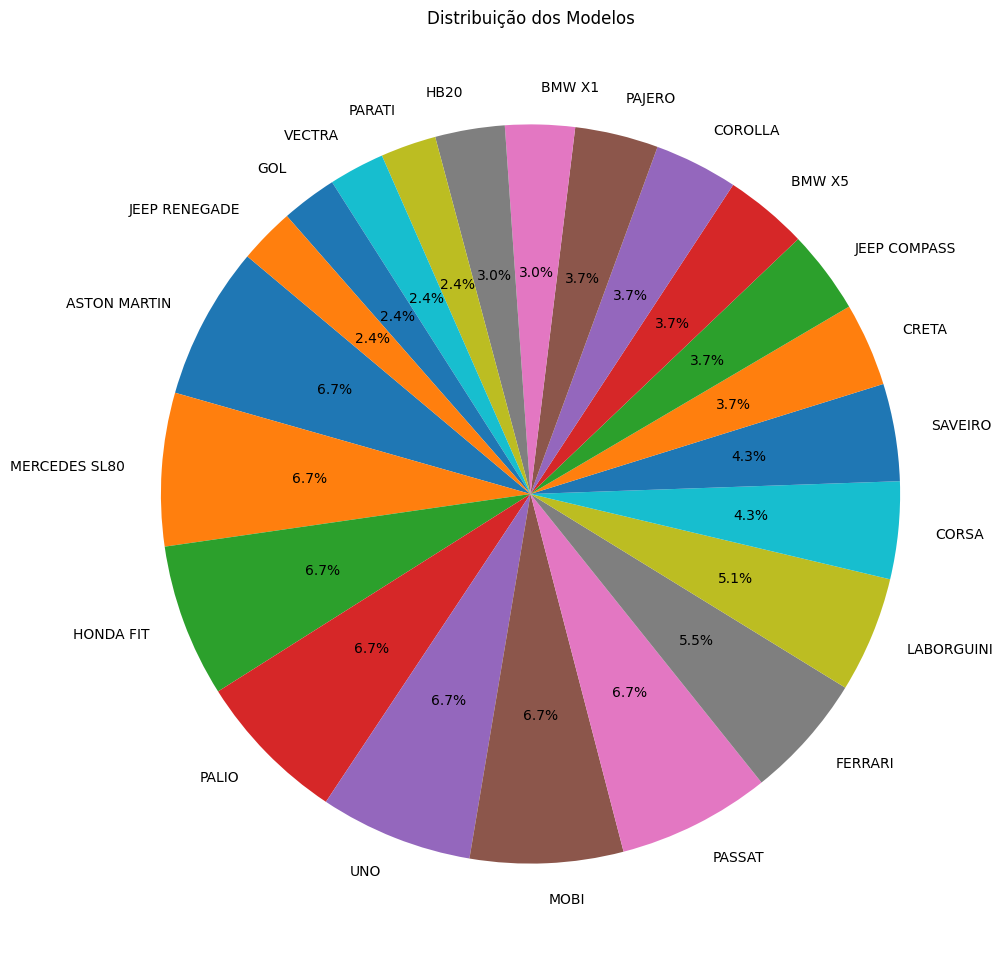

In [26]:
import matplotlib.pyplot as plt

# Contagem dos modelos
modelo_counts = df['MODELO'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(18,12))
plt.pie(modelo_counts, labels=modelo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Modelos')
plt.show()


## Distribuição de Transmissão

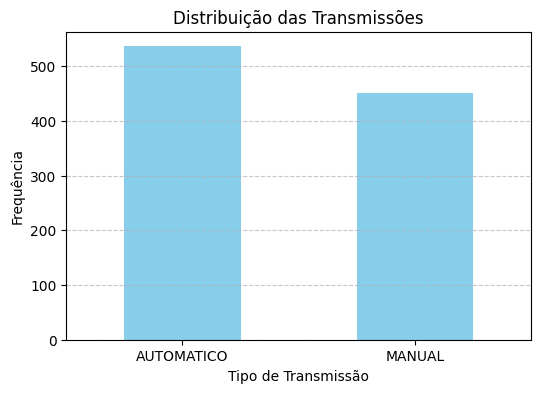

In [27]:
trans_counts = df['TRANSMISSAO'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
trans_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Transmissões')
plt.xlabel('Tipo de Transmissão')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##  Kilometros por litro

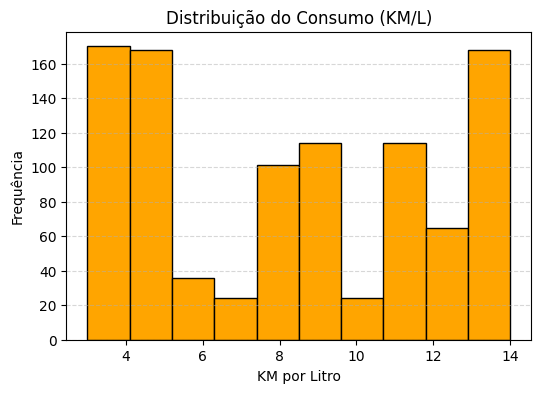

In [32]:
plt.figure(figsize=(6,4))
plt.hist(df['KM-LITRO'].dropna(), bins=10, color='orange', edgecolor='black')
plt.title('Distribuição do Consumo (KM/L)')
plt.xlabel('KM por Litro')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Frequência por País

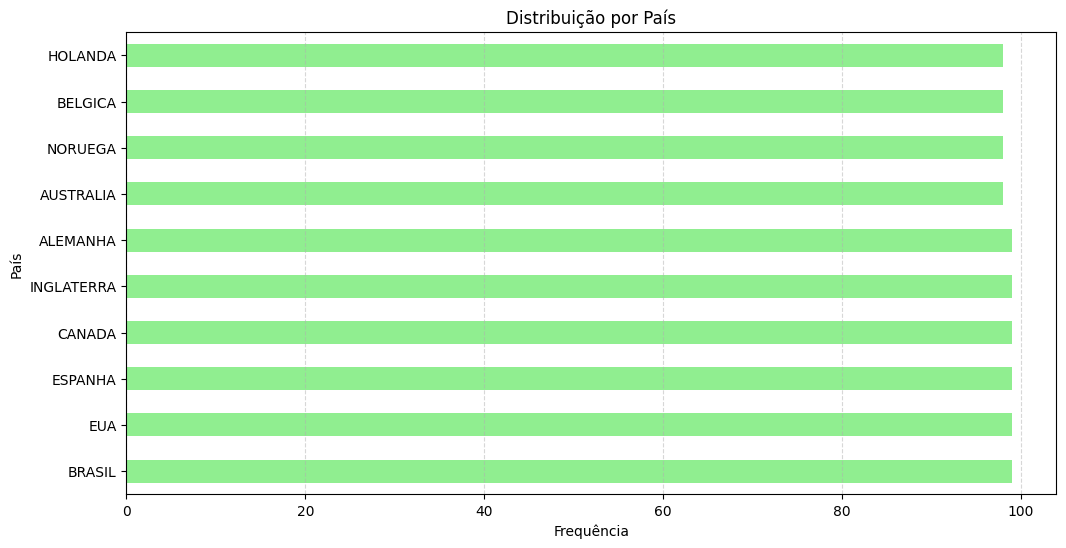

In [34]:
pais_counts = df['PAIS'].value_counts()

plt.figure(figsize=(12,6))
pais_counts.plot(kind='barh', color='lightgreen')
plt.title('Distribuição por País')
plt.xlabel('Frequência')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()